Stock Assignment Homework 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Question 1.

In [ ]:
#reading weekly dataset of NVDA
df = pd.read_csv("/Volumes/GoogleDrive/My Drive/NVDA.csv")

#getting weekly data for year 1
df_year_1 = pd.DataFrame()
df_year_1 = df[df["Year"] == 2020]
#removing any invalid columns
df_year_1 = df_year_1[df_year_1["Label"] != "undefined"]
df_year_1 = df_year_1.reset_index(drop=True)
df_year_1.head()

,Year,Week_Number,mean_return,volatility,Label
0,2020,0,0.1790,2.517300,green
1,2020,1,0.6902,0.443671,green
2,2020,2,0.4174,1.923896,red
3,2020,3,0.1240,1.014732,green
4,2020,4,-1.1110,3.027821,red


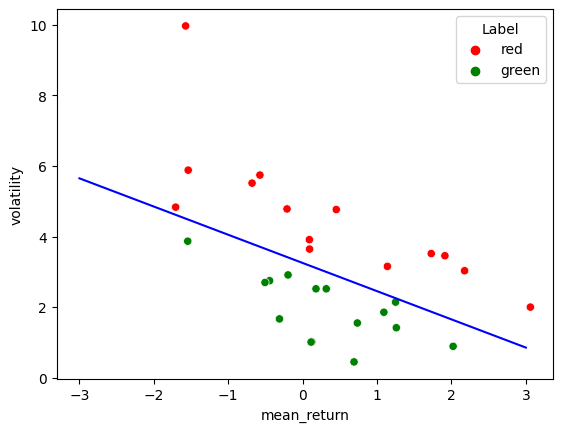

In [ ]:
#getting data for both classes or labels into seperate dataframes
df_year_1_red = df_year_1[df_year_1["Label"] == "red"]
df_year_1_green = df_year_1[df_year_1["Label"] == "green"]

#equation below was found after many experimentation on slope and intercept values
#y = -0.8*x+3.25

#removing some points to get a clear linear seperation between classes by using line equation as dividing parameter
df_year_1_red = df_year_1_red[df_year_1_red["volatility"] > -0.8*df_year_1_red["mean_return"]+3.25 ]
df_year_1_green = df_year_1_green[df_year_1_green["volatility"] < -0.8*df_year_1_green["mean_return"] + 3.25 ]

#putting reduced data back into dataframe for plotting
df_year_1 = pd.concat([df_year_1_red,df_year_1_green])
df_year_1 = df_year_1.reset_index(drop=True)

#creating a scatterplot
sns.scatterplot(x="mean_return",y="volatility",data=df_year_1,hue="Label",palette=["r","g"])

#creating line that seperates class labels
x = np.linspace(-3,3)
y = -0.8*x+3.25
plt.plot(x, y, '-b', label='y=2x+1')

In [ ]:
#The equation of this line is y = -0.8*x+3.25

Question 2.

In [ ]:
df_2 = pd.read_csv("/Volumes/GoogleDrive/My Drive/NVDA_weekly_return_detailed.csv")
#getting data for year 2(2021)
df_year_2 = df_2[df_2["Year"] == 2021 ]
df_year_2 = df_year_2.reset_index(drop=True)
df_year_2.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility
0,131.042496,136.524994,129.625000,131.134995,130.931641,56064000,0.448,1/4/21,1,2021,4,Monday,0.4106,4.26435
1,130.997498,134.434998,130.869995,134.047501,133.839630,32276000,2.221,1/5/21,1,2021,5,Tuesday,0.4106,4.26435
2,132.225006,132.449997,125.860001,126.144997,125.949387,58042400,-5.895,1/6/21,1,2021,6,Wednesday,0.4106,4.26435
3,129.675003,133.777496,128.865005,133.440002,133.233093,46148000,5.783,1/7/21,1,2021,7,Thursday,0.4106,4.26435
4,133.625000,134.210007,130.419998,132.767502,132.561630,29252800,-0.504,1/8/21,1,2021,8,Friday,0.4106,4.26435


In [ ]:
#Assigning green labels to year 2 based on previously established linear relation y = -0.8x + 3.25
df_year_2_green = df_year_2[df_year_2["volatility"] < -0.8*df_year_2["mean_return"] + 3.25 ]
df_year_2_green["Label"] = "green"

#Assigning red labels to year 2 based on previously established linear relation y = -0.8x + 3.25
df_year_2_red = df_year_2[df_year_2["volatility"] > -0.8*df_year_2["mean_return"] + 3.25 ]
df_year_2_red["Label"] = "red"

df_year_2 = pd.concat([df_year_2_green,df_year_2_red],ignore_index=True)
df_year_2.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
246,279.850006,289.220001,277.600006,278.010010,277.821350,71375800,-2.064,12/17/21,50,2021,17,Friday,-1.49980,5.942426,red
247,273.049988,281.440002,271.450012,277.190002,277.001892,46184700,-0.295,12/20/21,51,2021,20,Monday,1.63275,2.256175,red
248,283.739990,291.200012,274.010010,290.750000,290.552673,52438500,4.892,12/21/21,51,2021,21,Tuesday,1.63275,2.256175,red
249,288.910004,295.549988,284.489990,294.000000,293.800507,39518400,1.118,12/22/21,51,2021,22,Wednesday,1.63275,2.256175,red
250,297.549988,300.589996,294.309998,296.399994,296.198822,34302200,0.816,12/23/21,51,2021,23,Thursday,1.63275,2.256175,red


Question 3.

In [ ]:
#function to carry out inertia trading strategy
def inertia_trading_with_label(df):

    principal = 100

    #iterating through stock data for given year
    for ind in df.index:

        #when the day of the week has a green label we invest and additionally seeing if threshold found in previous assignment is satisfied
        if (df["Label"][ind] == "green") and  (abs( 100 * ((df['Close'][ind] - df['Open'][ind+1]) / df['Close'][ind] )) > 9.9):

            ###############################################################

            #buying shares with principal
            shares_to_buy = principal/df["Open"][ind]

            #selling stock at the end of the day at its closing price
            principal = shares_to_buy*df["Close"][ind]

            #################################################################

        #when the day of the week has a red label we dont invest
        else:

            continue


    return principal

In [ ]:
result = inertia_trading_with_label(df_year_2)
print("The Amount of money after trading using my strategy: "+ str(round(result,2))+" dollars")

The Amount of money after trading using my strategy: 99.2 dollars
